In [1]:
from src.config import RESULTS

Project Directory: /data2/mito_lineage


In [2]:
import pandas as pd
import pickle 
%matplotlib inline
import os
import seaborn as sns
os.chdir(RESULTS)
import matplotlib.pyplot as plt

## Indir

In [3]:
barcode_f = "mttrace/A/mapq_0/A_barcode_data.p"
coverage_f = "mttrace/A/01_bam_filter/mapq_0/A.coverage"

In [4]:
[CR_read_number,CB_read_number,BC_read_number, barcodes, corrected_barcodes, barcode_pairs] = pickle.load(open(barcode_f,"rb"))

In [5]:
len(CB_read_number)

2707

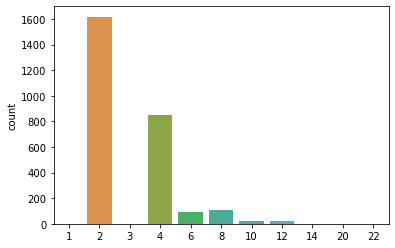

In [6]:
sns.countplot(list(CB_read_number.values()))

## First read in the original bam file

In [7]:
cov = pd.read_csv(coverage_f,sep="\t", header=None)

/home/isshamie/software/anaconda2/envs/mito_trace/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
cov

,0,1,2
0,1,10370,2
1,1,10371,2
2,1,10372,2
3,1,10373,4
4,1,10374,4
...,...,...,...
20291532,KI270752.1,14629,1
20291533,KI270752.1,14630,1
20291534,KI270752.1,14631,1
20291535,KI270752.1,14632,1


In [9]:
chrom_cov = cov.groupby(0).sum()
chrom_cov = chrom_cov[[2]]
chrom_cov.columns = ["Number of total basepairs"]
chrom_cov

,Number of total basepairs
0,
1,196379
2,111214
3,75250
4,51069
5,82364
6,100433
7,99032
8,55068
9,33781


In [10]:
mt_cov = cov[cov[0] == "MT"]
mt_cov

,0,1,2
19327708,MT,597,4
19327709,MT,598,4
19327710,MT,599,4
19327711,MT,600,4
19327712,MT,601,4
...,...,...,...
19343128,MT,16019,12
19343129,MT,16020,12
19343130,MT,16021,12
19343131,MT,16022,12


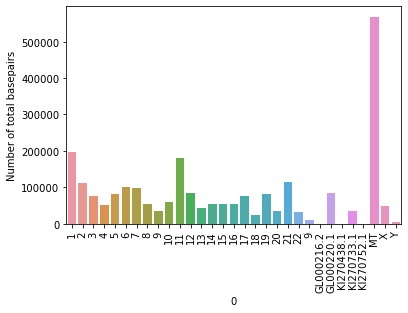

In [14]:
sns.barplot(x = chrom_cov.index, y = chrom_cov["Number of total basepairs"])
plt.xticks(rotation=90)
plt.savefig(coverage_f+'.png',bbox_inches='tight')

## Estimated number of MT basepair coverage per cell
chrom total number of bps mapped/16000bp/2500cells = number of bps mapped per MT genome per cell  
A value \>1 means each cell would see on average each bp of the mt covered by at least 1 read

In [23]:
chrom_cov.loc["MT"]/16000/2500

Number of total basepairs    0.014217
Name: MT, dtype: float64

In [12]:
coverage_f

'mttrace/A/01_bam_filter/mapq_0/A.coverage'

### With samtools view MT i got 9261 reads.. does that make sense given our coverage? We have about 50bp mapped per read

In [24]:
9261*50

463050

In [25]:
chrom_cov.loc["MT"]

Number of total basepairs    568674
Name: MT, dtype: int64

## They are actually not far off

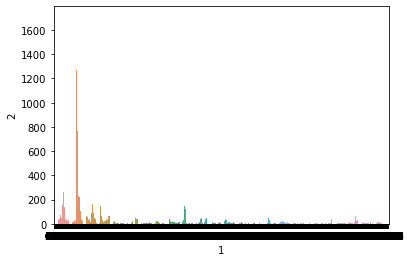

In [20]:
sns.barplot(x=1,y=2,data=mt_cov)